<center><h1 style="color:purple;">MONKEY IMAGE CLASSIFICATION</h1></center>

#### We are given images of 10 differen monkey species and wanted to desing a neural network model that predict  species of test images. 

#### I planned to try CNN deep learning algorithm to make predictions 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from random import randint
from matplotlib import pyplot as plt
from scipy import ndimage

#### Here I write a function named "get_images" to take training images from folder. I reshaped images to 100,100 size and converted them to gray colored images in order not to bother with 3 dimensional images

In [2]:
def get_images():
    Images = []
    Image_Class = []
    for image_file in os.listdir("training"): #Extracting the file name of the image from Class Label folder
        for image_adress in os.listdir("training/{}".format(image_file)):
            image = cv2.imread('training/'+ image_file + '/'+image_adress) #Reading the image (OpenCV)
            image = cv2.resize(image,(100,100)) #Resizing the image, Some images are different sizes.
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#Changing colors of image to gray in order to get rid of 3.dimension(RGB)
            Images.append(image)
            Image_Class.append(image_file)#Taking years from image name
        
    return shuffle(Images,Image_Class,random_state=25) #Shuffling the dataset.

#### After taking data, I converted lists to numpy arrays to take advantage of numpy's functions and numpy's multi dimensionality.

In [3]:
Images,Class = get_images() #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Class = np.array(Class) #converting the list of images to numpy array.

In [4]:
len(Images)

1098

#### Visualized images with class labels

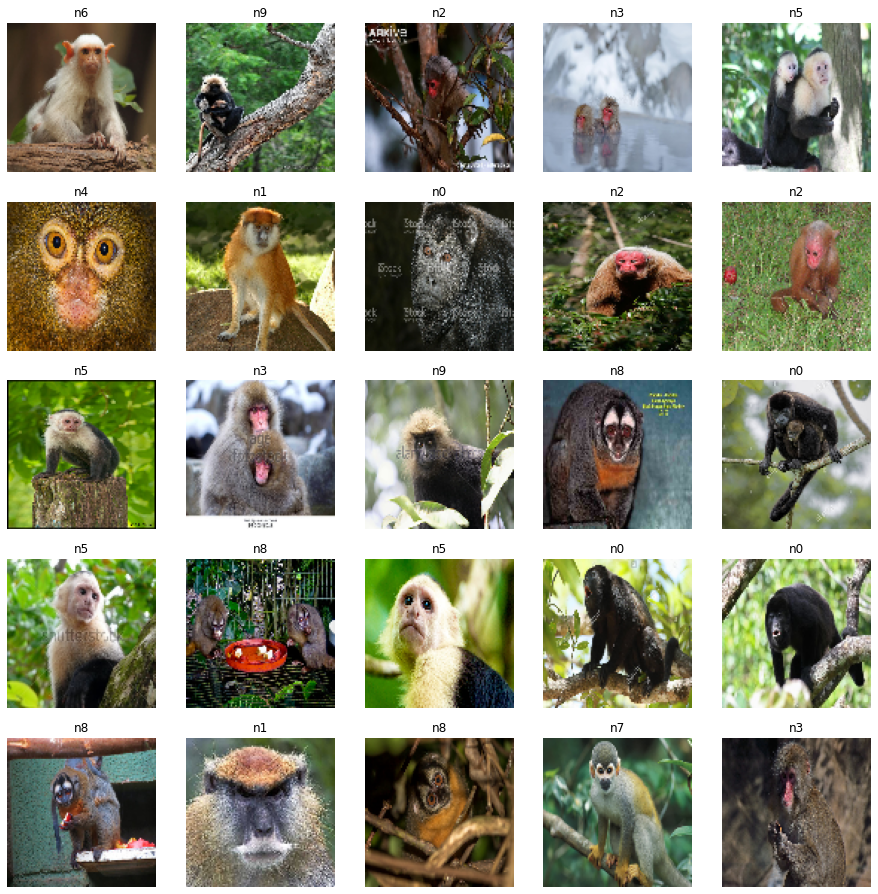

In [5]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(1,0,3,3)
for i in range(5):
    for j in range(5):
        rnd_number = randint(0,len(Images)-1)
        ax[i,j].imshow(cv2.cvtColor(Images[rnd_number], cv2.COLOR_BGR2RGB))
        ax[i,j].set_title(Class[rnd_number])#Shows classes
        ax[i,j].axis('off')

In [6]:
Images.shape

(1098, 100, 100, 3)

#### Here I created a variable that hods images' flattened version. Because I need to take pixels one by one in my Multi Layer Neural Network Class.

In [7]:
#Reshaping all images from 3 dimensions to 2 dimension
Images_flatten = Images.reshape(1098, 10000, 3)

In [8]:
Images_flatten

array([[[108, 197, 181],
        [107, 198, 183],
        [108, 198, 182],
        ...,
        [ 19,  57,  62],
        [ 17,  55,  60],
        [ 17,  51,  57]],

       [[ 65, 197, 162],
        [ 99, 230, 214],
        [ 22, 189, 175],
        ...,
        [193, 249, 241],
        [118, 196, 173],
        [ 60, 184, 150]],

       [[132, 159, 180],
        [139, 165, 183],
        [146, 167, 184],
        ...,
        [126, 139, 156],
        [132, 147, 167],
        [136, 154, 170]],

       ...,

       [[ 49,  92, 120],
        [ 39,  90, 110],
        [ 20,  91, 101],
        ...,
        [  2, 114, 107],
        [  2, 108, 102],
        [  0, 105, 101]],

       [[104, 106, 116],
        [128, 133, 134],
        [140, 143, 148],
        ...,
        [109, 121, 133],
        [109, 121, 132],
        [109, 120, 134]],

       [[ 20,  37,  33],
        [  6,  14,  11],
        [  3,  13,   7],
        ...,
        [  3,   9,   5],
        [  3,   8,   6],
        [  4,  10,   5]]

In [9]:
Class

array(['n7', 'n9', 'n1', ..., 'n1', 'n4', 'n2'], dtype='<U2')

#### Here I applied one hot encoding on labels. Because my labels were in string form and I will do some mathematical calculations to predict classes. For example I need to calculate loss function but I can't calculate it with string values

#### I didn't use values from 0 to 9 here because I classifying categorical classes. For example, when my algorithm predicted class 0, if the real class was 9, it would be perceived as a very bad prediction. Also when my algorithm predicted class 0, if the real class was 1, it would be perceived as a not bad prediction. But there is no such connection between classes so I used one hot encoder.

In [10]:
from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()
Class = ohe.fit_transform(Class.reshape(-1, 1)).toarray()

In [11]:
Class[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

# Data Splitting

#### I splitted given data in order to train my Multi Layer Neural Network Algorithm.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean

X_train, X_test, Y_train, Y_test = train_test_split(Images_flatten, Class, test_size=0.20, random_state=0)#Splitting normal image data

#### I normalized image pixels between 0 and 1 because too high and too low values of pixels may cause imbalance in weights and bias. 

In [13]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [14]:
X_train = NormalizeData(X_train)
X_test = NormalizeData(X_test)

#### Here I took traspose of train and test values in order to use them in dot products in the future.

In [15]:
#(sayı, boyut) seklindeki arrayleri (boyut, sayı) sekline getirdik
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

In [16]:
print("Shape of X_train :", X_train.shape)
print("Shape of Y_train :", Y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (3, 10000, 878)
Shape of Y_train : (10, 878)
Shape of X_test : (3, 10000, 220)
Shape of Y_test : (10, 220)


# Convolutional Neural Network

#### After my Multi Layer Neural Network Class, I used CNN classifier with importing keras library.

In [20]:
from tensorflow import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

#### I splitted data again because my algorithm was taking flattened image pixels but CNN algorithm of Keras library takes image pixels directly and flattens them after Convolutional and Pooling Layers.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import mean

train_X, test_X, train_Y, test_Y = train_test_split(Images, Class, test_size=0.20, random_state=0)#Splitting normal image data

#### Here I added 1 more dimension because algorithm needs 3 dimensional images and my images were 2 dimensional because I converted them into gray color.

In [22]:
train_X = train_X.reshape(-1, 100,100, 3)
test_X = test_X.reshape(-1, 100,100, 3)
train_X.shape, test_X.shape

((878, 100, 100, 3), (220, 100, 100, 3))

In [23]:
train_X

array([[[[ 44,  43,  39],
         [ 45,  41,  37],
         [ 66,  57,  47],
         ...,
         [ 50,  84,  74],
         [ 60,  99,  88],
         [ 68, 107,  97]],

        [[ 36,  42,  37],
         [ 47,  46,  37],
         [ 70,  60,  50],
         ...,
         [ 56,  94,  84],
         [ 66, 110,  97],
         [ 81, 123, 112]],

        [[ 37,  47,  41],
         [ 54,  53,  45],
         [ 71,  61,  51],
         ...,
         [ 62, 101,  89],
         [ 76, 118, 106],
         [ 79, 121, 110]],

        ...,

        [[147, 180, 199],
         [106, 142, 165],
         [179, 203, 215],
         ...,
         [ 27,  34,  37],
         [ 29,  37,  41],
         [ 31,  37,  41]],

        [[ 73, 129, 155],
         [ 82, 130, 152],
         [ 23,  89, 112],
         ...,
         [ 27,  35,  35],
         [ 29,  36,  40],
         [ 30,  37,  40]],

        [[ 60, 112, 133],
         [154, 175, 197],
         [ 66, 119, 134],
         ...,
         [ 25,  32,  35],
        

In [24]:
train_Y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

#### I normalized these images too.

In [25]:
#Normalization
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [26]:
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((878, 100, 100, 3), (220, 100, 100, 3), (878, 10), (220, 10))

In [27]:
train_X

array([[[[0.17254902, 0.16862746, 0.15294118],
         [0.1764706 , 0.16078432, 0.14509805],
         [0.25882354, 0.22352941, 0.18431373],
         ...,
         [0.19607843, 0.32941177, 0.2901961 ],
         [0.23529412, 0.3882353 , 0.34509805],
         [0.26666668, 0.41960785, 0.38039216]],

        [[0.14117648, 0.16470589, 0.14509805],
         [0.18431373, 0.18039216, 0.14509805],
         [0.27450982, 0.23529412, 0.19607843],
         ...,
         [0.21960784, 0.36862746, 0.32941177],
         [0.25882354, 0.43137255, 0.38039216],
         [0.31764707, 0.48235294, 0.4392157 ]],

        [[0.14509805, 0.18431373, 0.16078432],
         [0.21176471, 0.20784314, 0.1764706 ],
         [0.2784314 , 0.23921569, 0.2       ],
         ...,
         [0.24313726, 0.39607844, 0.34901962],
         [0.29803923, 0.4627451 , 0.41568628],
         [0.30980393, 0.4745098 , 0.43137255]],

        ...,

        [[0.5764706 , 0.7058824 , 0.78039217],
         [0.41568628, 0.5568628 , 0.64705884]

### CNN Without Dropout

#### Firstly I used CNN without adding Dropout layers to see whether if it is overfitting or not. 

#### At the beginning I used 3 Convolution - Pooling layers with "relu" activation function to reduce dimensions of images and concantrate on densities on images. Then I flattened them in Flattening Layer. After that I passed through pixels hidden layers with "relu" activation function and with 150, 100 and 50 nodes respectively. Finally I defined output layer with 10 nodes and "softmax" activation function for prediction.

In [28]:
cnn_model1 = Sequential()
cnn_model1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3)))
cnn_model1.add(MaxPooling2D((2, 2)))
cnn_model1.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model1.add(Conv2D(128, (3, 3), activation='relu'))                
cnn_model1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model1.add(Flatten()) 
cnn_model1.add(Dense(64, activation='relu'))      
cnn_model1.add(Dense(32, activation='relu')) 
cnn_model1.add(Dense(10, activation='softmax'))

In [29]:
cnn_model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

cnn_train1 = cnn_model1.fit(train_X, train_Y, batch_size=16,epochs=20,verbose=1,validation_data=(test_X, test_Y))

Epoch 1/20
55/55 [==============================] - 5s 77ms/step - loss: 2.3070 - accuracy: 0.1093 - val_loss: 2.2666 - val_accuracy: 0.1864
Epoch 2/20
55/55 [==============================] - 4s 75ms/step - loss: 2.1728 - accuracy: 0.2118 - val_loss: 2.0452 - val_accuracy: 0.2136
Epoch 3/20
55/55 [==============================] - 4s 79ms/step - loss: 1.8707 - accuracy: 0.3531 - val_loss: 1.6439 - val_accuracy: 0.3864
Epoch 4/20
55/55 [==============================] - 4s 76ms/step - loss: 1.5203 - accuracy: 0.4692 - val_loss: 1.5256 - val_accuracy: 0.4636
Epoch 5/20
55/55 [==============================] - 4s 75ms/step - loss: 1.2139 - accuracy: 0.5979 - val_loss: 1.4643 - val_accuracy: 0.4818
Epoch 6/20
55/55 [==============================] - 4s 76ms/step - loss: 1.0305 - accuracy: 0.6481 - val_loss: 1.4304 - val_accuracy: 0.4818
Epoch 7/20
55/55 [==============================] - 4s 77ms/step - loss: 0.7958 - accuracy: 0.7392 - val_loss: 1.1887 - val_accuracy: 0.5955
Epoch 8/20
55

#### After trained my model, I plotted training accuracy-validation accuracy graph and training loss-validation loss graph to see whether my model is overfitting or not.

#### In graphs we can clearly see that my model is overfitting. So I decided to try to add Dropout layers to avoid overfitting.

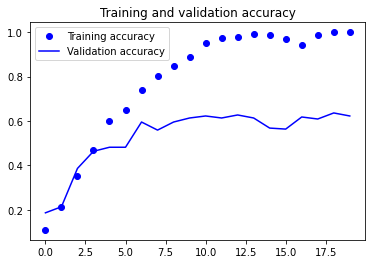

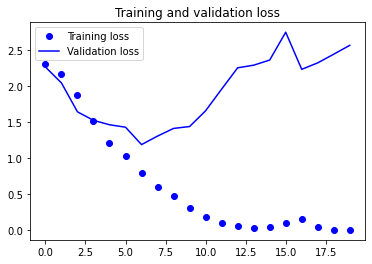

In [30]:
accuracy = cnn_train1.history['accuracy']
val_accuracy = cnn_train1.history['val_accuracy']
loss = cnn_train1.history['loss']
val_loss = cnn_train1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### CNN With Dropout

#### I created the same structure but I added Dropout layers between fully conncted layers and trained my model.

In [31]:
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3)))
cnn_model2.add(MaxPooling2D((2, 2)))
cnn_model2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Conv2D(512, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(1028, activation='relu'))        
cnn_model2.add(Dropout(0.8))
cnn_model2.add(Dense(10, activation='softmax'))

In [32]:
cnn_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [33]:
cnn_train_dropout2 = cnn_model2.fit(train_X, train_Y, batch_size=128,epochs=30,verbose=1,validation_data=(test_X, test_Y))

Epoch 1/30
7/7 [==============================] - 6s 789ms/step - loss: 2.3129 - accuracy: 0.0991 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 2/30
7/7 [==============================] - 5s 722ms/step - loss: 2.2994 - accuracy: 0.1116 - val_loss: 2.3005 - val_accuracy: 0.0818
Epoch 3/30
7/7 [==============================] - 5s 727ms/step - loss: 2.2699 - accuracy: 0.1549 - val_loss: 2.3172 - val_accuracy: 0.1136
Epoch 4/30
7/7 [==============================] - 5s 735ms/step - loss: 2.1777 - accuracy: 0.2005 - val_loss: 2.0702 - val_accuracy: 0.2227
Epoch 5/30
7/7 [==============================] - 5s 730ms/step - loss: 1.9996 - accuracy: 0.2449 - val_loss: 1.8779 - val_accuracy: 0.3273
Epoch 6/30
7/7 [==============================] - 5s 736ms/step - loss: 1.9569 - accuracy: 0.2403 - val_loss: 1.8656 - val_accuracy: 0.2955
Epoch 7/30
7/7 [==============================] - 5s 742ms/step - loss: 1.8701 - accuracy: 0.2836 - val_loss: 1.8398 - val_accuracy: 0.3000
Epoch 8/30
7/7 [====

#### And it is also overfiting after 15-20 iterations but it still fits better than CNN without Dropout layer.

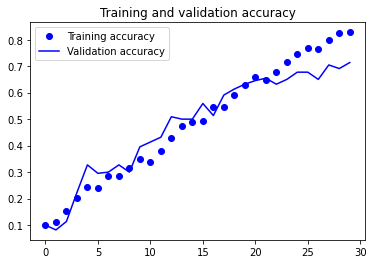

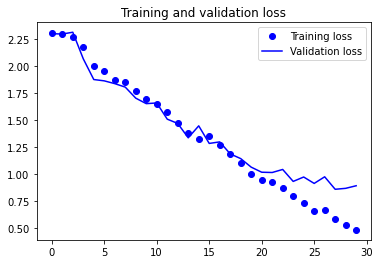

In [34]:
accuracy = cnn_train_dropout2.history['accuracy']
val_accuracy = cnn_train_dropout2.history['val_accuracy']
loss = cnn_train_dropout2.history['loss']
val_loss = cnn_train_dropout2.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### After all I printed accuracy and loss of CNN without Dropout and CNN with Dropout algorithm. Although CNN without Dropout algorithm has better accuracy score, I used CNN with Dropout algorithm because it has much better loss function.

In [35]:
print("CNN without Dropout")
test_eval1 = cnn_model1.evaluate(test_X, test_Y, verbose=1)

CNN without Dropout
7/7 [==============================] - 0s 40ms/step - loss: 2.5675 - accuracy: 0.6227


In [36]:
print("CNN with Dropout")
test_eval2 = cnn_model2.evaluate(test_X, test_Y, verbose=1)

CNN with Dropout
7/7 [==============================] - 0s 49ms/step - loss: 0.8912 - accuracy: 0.7136


# Result

| Model Name | Dropout | Validation Loss | Validation Accuray |
| --- | --- | --- | --- |
| cnn_model1 | No | 2.56 | 0.62 |
| cnn_model2 | Yes | 0.89 | 0.71 |

#### So I used cnn_model2 on test dataset

In [37]:
def get_images(directory):
    Images = []
    Image_Names = []
    for image_file in os.listdir(directory): #Extracting the file name of the image from Class Label folder
        image = cv2.imread(directory+'/'+image_file) #Reading the image (OpenCV)
        image = cv2.resize(image,(100,100)) #Resizing the image, Some images are different sizes.
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)#Changing colors of image to gray in order to get rid of 3.dimension(RGB)
        Images.append(image)
        Image_Names.append(image_file)#Taking years from image name
        
    return shuffle(Images,Image_Names,random_state=817328462) #Shuffling the dataset.

In [38]:
Test_Images,Test_Names = get_images("test") #Extract the training images from the folders.

Test_Images = np.array(Test_Images) #converting the list of images to numpy array.

In [39]:
Test_Images = Test_Images.reshape(-1, 100,100, 3)
Test_Images.shape

(272, 100, 100, 3)

In [40]:
Test_Images = Test_Images.astype('float32')
Test_Images = Test_Images / 255.
Test_Images

array([[[[0.654902  , 0.7019608 , 0.654902  ],
         [0.654902  , 0.69803923, 0.65882355],
         [0.6509804 , 0.69411767, 0.6627451 ],
         ...,
         [0.28235295, 0.38039216, 0.41568628],
         [0.20392157, 0.3254902 , 0.36078432],
         [0.13333334, 0.2627451 , 0.3254902 ]],

        [[0.76862746, 0.79607844, 0.7529412 ],
         [0.7490196 , 0.77254903, 0.7372549 ],
         [0.7372549 , 0.7529412 , 0.7254902 ],
         ...,
         [0.23921569, 0.35686275, 0.39215687],
         [0.21568628, 0.35686275, 0.39607844],
         [0.28235295, 0.41568628, 0.47058824]],

        [[0.8784314 , 0.8745098 , 0.8352941 ],
         [0.85490197, 0.84705883, 0.8156863 ],
         [0.81960785, 0.80784315, 0.7882353 ],
         ...,
         [0.3372549 , 0.43529412, 0.49019608],
         [0.3019608 , 0.4117647 , 0.46666667],
         [0.3254902 , 0.45882353, 0.50980395]],

        ...,

        [[0.13333334, 0.25882354, 0.21568628],
         [0.14117648, 0.2627451 , 0.22745098]

In [41]:
Test_Names

['46.jpg',
 '168.jpg',
 '191.jpg',
 '209.jpg',
 '63.jpg',
 '71.jpg',
 '87.jpg',
 '200.jpg',
 '95.jpg',
 '232.jpg',
 '80.jpg',
 '199.jpg',
 '38.jpg',
 '106.jpg',
 '105.jpg',
 '176.jpg',
 '34.jpg',
 '139.jpg',
 '204.jpg',
 '158.jpg',
 '103.jpg',
 '144.jpg',
 '128.jpg',
 '182.jpg',
 '55.jpg',
 '26.jpg',
 '108.jpg',
 '261.jpg',
 '16.jpg',
 '56.jpg',
 '67.jpg',
 '150.jpg',
 '135.jpg',
 '194.jpg',
 '154.jpg',
 '82.jpg',
 '239.jpg',
 '5.jpg',
 '167.jpg',
 '42.jpg',
 '141.jpg',
 '188.jpg',
 '75.jpg',
 '161.jpg',
 '3.jpg',
 '249.jpg',
 '238.jpg',
 '119.jpg',
 '169.jpg',
 '179.jpg',
 '122.jpg',
 '244.jpg',
 '234.jpg',
 '146.jpg',
 '39.jpg',
 '65.jpg',
 '78.jpg',
 '140.jpg',
 '230.jpg',
 '14.jpg',
 '269.jpg',
 '271.jpg',
 '225.jpg',
 '231.jpg',
 '192.jpg',
 '162.jpg',
 '121.jpg',
 '1.jpg',
 '263.jpg',
 '170.jpg',
 '59.jpg',
 '73.jpg',
 '37.jpg',
 '43.jpg',
 '127.jpg',
 '193.jpg',
 '17.jpg',
 '222.jpg',
 '242.jpg',
 '270.jpg',
 '173.jpg',
 '72.jpg',
 '132.jpg',
 '187.jpg',
 '58.jpg',
 '48.jpg',
 '

In [42]:
np.argmax(cnn_model2.predict(Test_Images)[2])

5

In [43]:
cnn_model2.predict(Test_Images)[2]

array([6.3862324e-02, 1.9345898e-03, 2.2481444e-04, 3.5534010e-04,
       1.6609622e-03, 8.0445111e-01, 7.7047911e-03, 6.7183510e-03,
       1.3581625e-03, 1.1172948e-01], dtype=float32)

In [44]:
predictions = list()
for i in range(len(Test_Names)):
    predictions.append(np.argmax(cnn_model2.predict(Test_Images)[i]))

In [45]:
prediction = list()
for i in predictions:
    prediction.append("n" + str(i))

In [46]:
guess_df = pd.DataFrame({"Name":Test_Names, "Class":prediction})
guess_df.head()

,Name,Class
0,46.jpg,n2
1,168.jpg,n8
2,191.jpg,n5
3,209.jpg,n8
4,63.jpg,n8


In [47]:
guess_df.to_csv ("Test_Prediction.csv", index = False, header=True)